In [1]:
# Add imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Load in the data
filename1 = "baskets_sample.csv"
filename2 = "category_spends_sample.csv"
filename3 = "customers_sample.csv"
filename4 = "lineitems_sample.csv"

baskets_sample = pandas.read_csv(filename1)
category_spends_sample = pandas.read_csv(filename2)
customers_sample = pandas.read_csv(filename3)
lineitems_sample = pandas.read_csv(filename4)

#-- Summary of the number of datapoints and featuers
print("Number of datapoints %d and number of features %d in the baskets_sample table" %(baskets_sample.shape[0],baskets_sample.shape[0]))
print("Number of datapoints %d and number of features %d in the category_spends_sample  table" %(category_spends_sample.shape[0],category_spends_sample.shape[0]))
print("Number of datapoints %d and number of features %d in the lineitems_sample table" %(lineitems_sample.shape[0],lineitems_sample.shape[0]))
print("Number of datapoints %d and number of features %d in the customers_sample table" %(customers_sample.shape[0],customers_sample.shape[0]))

Number of datapoints 195547 and number of features 195547 in the baskets_sample table
Number of datapoints 3000 and number of features 3000 in the category_spends_sample  table
Number of datapoints 1048575 and number of features 1048575 in the lineitems_sample table
Number of datapoints 3000 and number of features 3000 in the customers_sample table


In [3]:
baskets_sample.head(3) 

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,01-03-2007 07:06,7,3.09,3
1,4047,01-03-2007 07:13,9,7.99,5
2,3571,01-03-2007 07:27,9,37.06,6


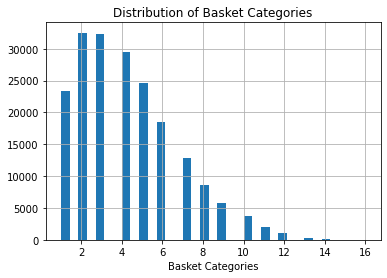

In [4]:
baskets_sample.hist('basket_categories', bins=35);
plt.title('Distribution of Basket Categories');
plt.xlabel('Basket Categories');

In [5]:
category_spends_sample.head(3)

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,64.58,35.91,107.78,27.08,29.59,0.0,54.83,6.35,22.83,...,28.62,162.1,28.02,28.12,28.54,2.0,15.0,7.48,0.0,0.84
1,8171,16.89,37.24,28.84,33.43,66.40,0.0,22.06,12.09,2.34,...,26.44,0.0,8.42,2.65,3.76,0.0,0.0,9.99,0.0,0.00
2,1060,87.30,82.98,49.88,20.57,37.04,0.0,9.85,57.98,31.12,...,54.65,0.0,0.00,2.60,0.00,18.0,20.0,106.46,0.0,0.00


In [6]:
customers_sample.head(3)

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,4749,220,260,1.181818,631.12,2.87
1,4757,248,333,1.342742,452.42,1.82
2,144,226,303,1.340708,261.16,1.16


In [7]:
lineitems_sample.head(3)

,customer_number,purchase_time,product_id,category,quantity,spend
0,14,21-03-2007 18:45,34926,BAKERY,1,0.55
1,14,03-03-2007 15:37,34926,BAKERY,1,0.55
2,14,27-03-2007 16:28,34926,BAKERY,1,0.55


In [8]:
from pathlib import Path
Path('Database.db').touch()
import sqlite3
con = sqlite3.connect('Database.db')
cur = con.cursor()
sqlite3.sqlite_version

'3.31.1'

In [9]:
lineitems_sample.to_sql('lineitems_sample', con,  index=False)

In [10]:
baskets_sample.to_sql('baskets_sample', con,  index=False)

In [11]:
customers_sample.to_sql('customers_sample', con, index=False)

In [12]:
!pip3 install sqlalchemy # -- install library if you haven't already
!pip3 install sqlalchemy_schemadisplay
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph
from sqlalchemy import  create_engine
import pandas 

engine = create_engine('sqlite:///Database.db') # using relative path
meta = MetaData(bind=engine)
engine.connect()
print(engine)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy_schemadisplay: filename=sqlalchemy_schemadisplay-1.3-py3-none-any.whl size=5930 sha256=663382fb2f34dec90b4ed2990b2e4c245cd3c6b849d43805a6cd2355b1e6c05c
  Stored in directory: /root/.cache/pip/wheels/da/3b/3e/e0dc63e2c61a6b61af019575aaa876ab33a6a9a8581822239e
Successfully built sqlalchemy_schemadisplay
Engine(sqlite:///Database.db)


<ipython-input-12-72080353d2fd>:9: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  meta = MetaData(bind=engine)


In [13]:
x= pandas.read_sql_query("""SELECT * FROM lineitems_sample WHERE customer_number= 7210 AND category like 'BAKERY'""", con)
print(x)

     customer_number     purchase_time  product_id category  quantity  spend
0               7210  09-03-2007 10:28       33631   BAKERY         1   1.55
1               7210  22-03-2007 10:53       33631   BAKERY         2   3.10
2               7210  01-03-2007 10:50       33631   BAKERY         1   1.55
3               7210  29-03-2007 10:49       37733   BAKERY         1   1.69
4               7210  22-03-2007 10:53       62669   BAKERY         1   1.15
..               ...               ...         ...      ...       ...    ...
106             7210  16-08-2007 10:16      697598   BAKERY         6   1.26
107             7210  02-08-2007 10:46      697598   BAKERY         6   1.26
108             7210  28-08-2007 10:41      697598   BAKERY         4   0.84
109             7210  09-08-2007 10:31      697598   BAKERY         6   1.26
110             7210  28-08-2007 10:41      712052   BAKERY         1   1.15

[111 rows x 6 columns]


In [14]:
# Engineer new features from existing tables. Save newly-engineered features in new dataframe. 

# Creating a new dataframe of purchased quantities across product categries
lineitems_sample_quantity= lineitems_sample.groupby(['customer_number','category'])['spend'].sum().unstack('category', fill_value=0).add_prefix('Total Spend_')
lineitems_sample_quantity.reset_index()

lineitems_sample_quantity.head()

category,Total Spend_BAKERY,Total Spend_CASHPOINT,Total Spend_CONFECTIONARY,Total Spend_DAIRY,Total Spend_DELI,Total Spend_DISCOUNT_BAKERY,Total Spend_DRINKS,Total Spend_FROZEN,Total Spend_FRUIT_VEG,Total Spend_GROCERY_FOOD,Total Spend_GROCERY_HEALTH_PETS,Total Spend_LOTTERY,Total Spend_MEAT,Total Spend_NEWSPAPERS_MAGAZINES,Total Spend_PRACTICAL_ITEMS,Total Spend_PREPARED_MEALS,Total Spend_SEASONAL_GIFTING,Total Spend_SOFT_DRINKS,Total Spend_TOBACCO,Total Spend_WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
14,5.90,0.0,23.22,172.58,0.00,1.25,74.12,17.12,11.10,56.05,9.71,0.0,57.90,6.40,0.00,10.29,5.07,2.67,0.0,7.92
45,9.45,0.0,106.54,142.16,0.00,0.00,0.00,4.51,30.21,83.42,10.19,0.0,43.41,7.62,0.00,27.51,0.00,17.33,0.0,3.47
52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,53.29,1.08,12.11,0.0,4.98,1.99,0.00,0.00,20.06,3.17,0.0,15.06
61,11.70,0.0,46.39,55.29,3.81,0.00,13.00,18.63,70.18,56.18,19.63,0.0,51.59,1.60,1.52,6.88,3.04,6.94,0.0,1.19
63,10.92,0.0,73.07,42.11,11.67,0.00,0.00,3.88,22.01,13.54,5.69,2.0,2.49,0.45,0.00,0.00,0.00,1.19,0.0,5.79


In [15]:
import pandas as pd

# Created a dictionary of data
data1 = {'Category': ['BAKERY', 'CASHPOINT', 'CONFECTIONARY', 'DAIRY', 'DELI', 'DISCOUNT_BAKERY', 'DRINKS', 'FROZEN', 'FRUIT_VEG', 'GROCERY_FOOD', 'GROCERY_HEALTH_PETS', 'LOTTERY', 'MEAT', 'NEWSPAPERS_MAGAZINES', 'PRACTICAL_ITEMS', 'PREPARED_MEALS', 'SEASONAL_GIFTING', 'SOFT_DRINKS', 'TOBACCO', 'WORLD_FOODS'],
        'Total Spend': [46945.59, 52703.020000000004, 172043.38, 213908.05, 19732.46, 2388.14, 108142.53, 54771.92, 208368.49, 180022.59, 91990.4, 14618.599999999999, 78865.05, 21912.06, 4135.7, 45963.46, 14022.619999999999, 29546.17, 103164.20999999999, 10769.93]}

# create pandas DataFrame
df1 = pd.DataFrame(data1)

# display DataFrame
print(df1)



                Category  Total Spend
0                 BAKERY     46945.59
1              CASHPOINT     52703.02
2          CONFECTIONARY    172043.38
3                  DAIRY    213908.05
4                   DELI     19732.46
5        DISCOUNT_BAKERY      2388.14
6                 DRINKS    108142.53
7                 FROZEN     54771.92
8              FRUIT_VEG    208368.49
9           GROCERY_FOOD    180022.59
10   GROCERY_HEALTH_PETS     91990.40
11               LOTTERY     14618.60
12                  MEAT     78865.05
13  NEWSPAPERS_MAGAZINES     21912.06
14       PRACTICAL_ITEMS      4135.70
15        PREPARED_MEALS     45963.46
16      SEASONAL_GIFTING     14022.62
17           SOFT_DRINKS     29546.17
18               TOBACCO    103164.21
19           WORLD_FOODS     10769.93


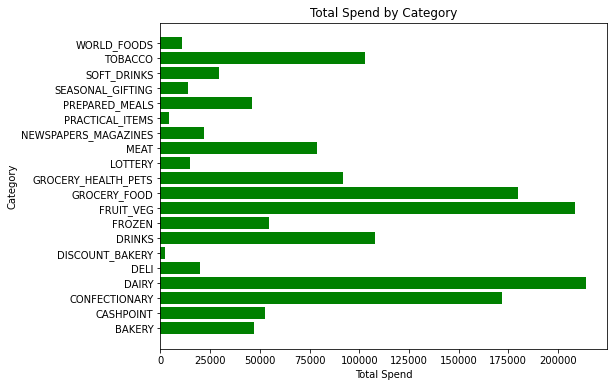

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(df1['Category'], df1['Total Spend'], color='green')
ax.set_xlabel('Total Spend')
ax.set_ylabel('Category')
ax.set_title('Total Spend by Category')

plt.show()

In [17]:
import pandas as pd

# create a sample dataframe
df = pd.read_csv('category_spends_sample.csv')
#df= df.drop(['customer_number'], axis = 1, inplace = True)
print(df)

      customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0               11387      64.58   35.91         107.78         27.08   
1                8171      16.89   37.24          28.84         33.43   
2                1060      87.30   82.98          49.88         20.57   
3                3728      84.05  186.56         175.50        119.84   
4               14621      35.16  121.31          79.23         29.03   
...               ...        ...     ...            ...           ...   
2995            12541      64.52   73.84          89.36        135.31   
2996            16081       5.91   18.08          18.32         23.69   
2997             7094     116.54  106.08          42.31         35.92   
2998             3457       3.68   13.44          21.96         10.10   
2999             6647      78.65   47.23          40.78         52.82   

      grocery_health_pets  bakery  newspapers_magazines  prepared_meals  \
0                   29.59     0.0               

In [18]:
# combine columns into one column
df['Premade_Food'] = df['prepared_meals'] + df['frozen'] + df['deli'] 
df['Grocery_food'] = df['fruit_veg'] + df['grocery_food'] + df['meat'] + df['world_foods']
df['Alcohol'] = df['drinks'] + df['soft_drinks']
df['Bakers'] = df['dairy'] + df['confectionary']
df['Offer_Zone'] = df['lottery'] + df['cashpoint']+ df['discount_bakery']

# drop original columns
#df = df.drop([])
# display the resulting dataframe
print(df)

      customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0               11387      64.58   35.91         107.78         27.08   
1                8171      16.89   37.24          28.84         33.43   
2                1060      87.30   82.98          49.88         20.57   
3                3728      84.05  186.56         175.50        119.84   
4               14621      35.16  121.31          79.23         29.03   
...               ...        ...     ...            ...           ...   
2995            12541      64.52   73.84          89.36        135.31   
2996            16081       5.91   18.08          18.32         23.69   
2997             7094     116.54  106.08          42.31         35.92   
2998             3457       3.68   13.44          21.96         10.10   
2999             6647      78.65   47.23          40.78         52.82   

      grocery_health_pets  bakery  newspapers_magazines  prepared_meals  \
0                   29.59     0.0               

In [19]:
df = df.drop(['prepared_meals', 'bakery', 'frozen', 'deli', 'fruit_veg', 'grocery_food', 'meat', 'world_foods', 'drinks', 'soft_drinks', 'tobacco', 'dairy', 'confectionary', 'lottery', 'cashpoint', 'discount_bakery', 'grocery_health_pets', 'newspapers_magazines', 'seasonal_gifting', 'practical_items'], axis=1)

In [20]:
print(df)

      customer_number  Premade_Food  Grocery_food  Alcohol  Bakers  Offer_Zone
0               11387         55.98        148.82    50.85  143.69        17.0
1                8171         93.48         80.52    10.76   66.08         0.0
2                1060         75.11        162.52    31.12  132.86        38.0
3                3728         40.78        204.84   124.42  362.06         4.0
4               14621        102.49        100.43     7.23  200.54         0.0
...               ...           ...           ...      ...     ...         ...
2995            12541        156.24        261.97    56.62  163.20         0.0
2996            16081         24.68         39.34     0.67   36.40        30.0
2997             7094          8.77        176.56    29.09  148.39         0.0
2998             3457         17.50         20.09     4.33   35.40         0.0
2999             6647         58.19        209.66    30.56   88.01       235.0

[3000 rows x 6 columns]


In [21]:
df = df.drop(['customer_number'], axis = 1)
print(df)

      Premade_Food  Grocery_food  Alcohol  Bakers  Offer_Zone
0            55.98        148.82    50.85  143.69        17.0
1            93.48         80.52    10.76   66.08         0.0
2            75.11        162.52    31.12  132.86        38.0
3            40.78        204.84   124.42  362.06         4.0
4           102.49        100.43     7.23  200.54         0.0
...            ...           ...      ...     ...         ...
2995        156.24        261.97    56.62  163.20         0.0
2996         24.68         39.34     0.67   36.40        30.0
2997          8.77        176.56    29.09  148.39         0.0
2998         17.50         20.09     4.33   35.40         0.0
2999         58.19        209.66    30.56   88.01       235.0

[3000 rows x 5 columns]


Text(0.5, 0, 'Boxplots of product category variables')

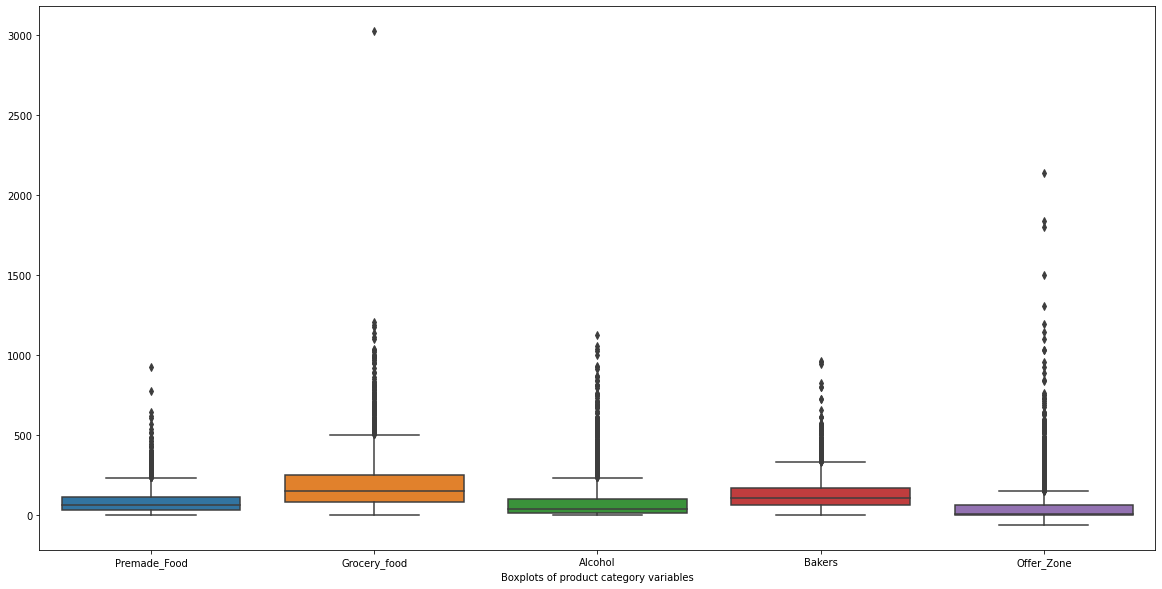

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax= plt.subplots(figsize=(20, 10))
boxplots= sns.boxplot(data = df)
plt.xlabel('Boxplots of product category variables')

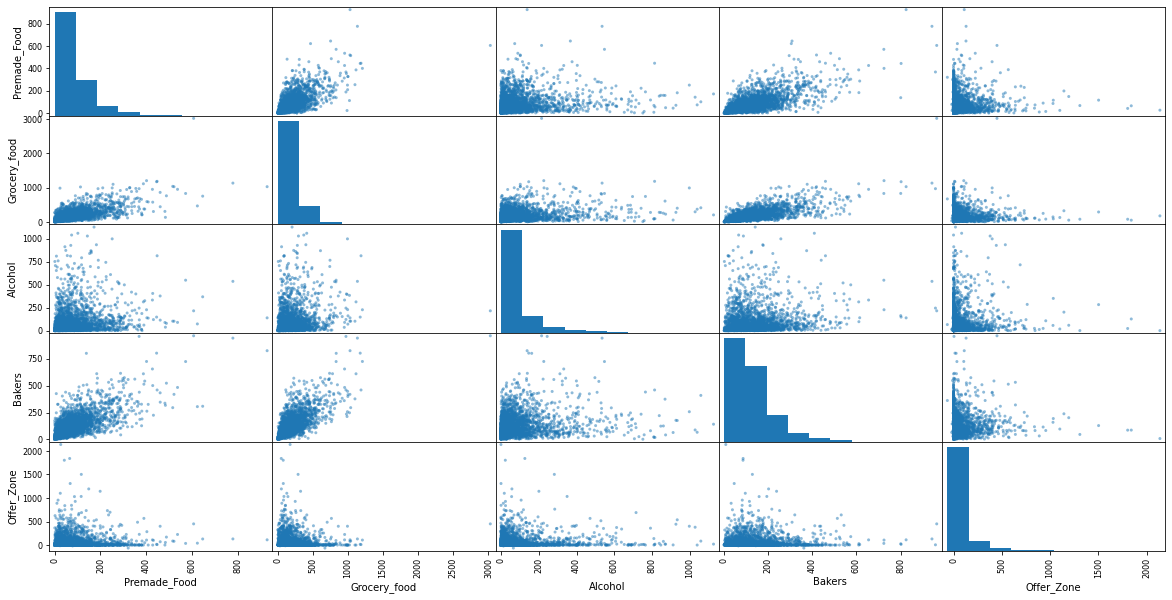

In [23]:
scatter = pandas.plotting.scatter_matrix(df, figsize = (20,10))

In [24]:
corr = df.corr()
print(corr)

              Premade_Food  Grocery_food   Alcohol    Bakers  Offer_Zone
Premade_Food      1.000000      0.670191  0.188926  0.683063    0.022810
Grocery_food      0.670191      1.000000  0.241997  0.715069   -0.017638
Alcohol           0.188926      0.241997  1.000000  0.185402    0.072163
Bakers            0.683063      0.715069  0.185402  1.000000    0.041574
Offer_Zone        0.022810     -0.017638  0.072163  0.041574    1.000000


Text(0.5, 68.09375, 'Product category variables correlations')

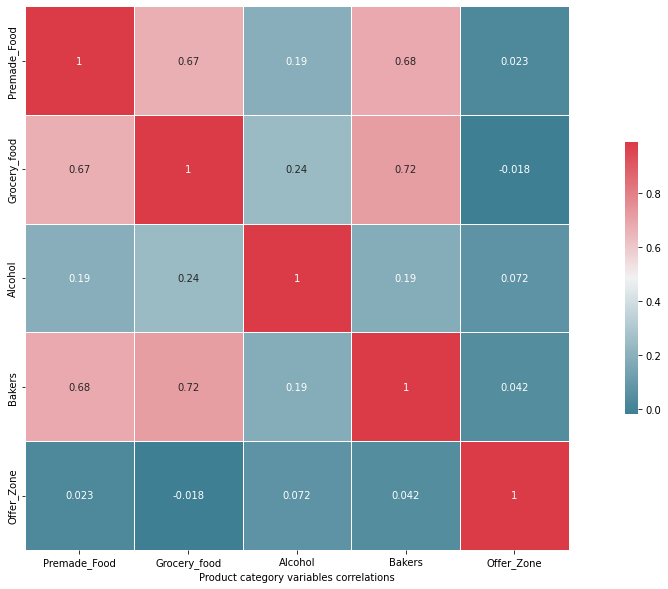

In [25]:
#--Set up the matplotlib figure
fig, ax= plt.subplots(figsize=(20, 10))

#--Generated a heatmap
cmap= sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.xlabel('Product category variables correlations')

      Premade_Food  Grocery_food   Alcohol    Bakers  Offer_Zone
0         4.024994      5.002738  3.928880  4.967658    2.833213
2         4.318954      5.090801  3.437851  4.889296    3.637586
3         3.708192      5.322229  4.823663  5.891810    1.386294
5         3.441379      4.432007  3.936130  3.687629    2.423031
7         4.275971      5.208338  3.098289  4.639378    2.995732
...            ...           ...       ...       ...         ...
2992      3.805328      5.165529  3.076851  5.200043    4.564348
2993      3.506158      5.245075  3.173460  5.220248    3.065258
2994      4.103635      4.610357  2.037317  4.347435    5.786897
2996      3.205993      3.672242 -0.400478  3.594569    3.401197
2999      4.063714      5.345487  3.419692  4.477450    5.459586

[1806 rows x 5 columns]


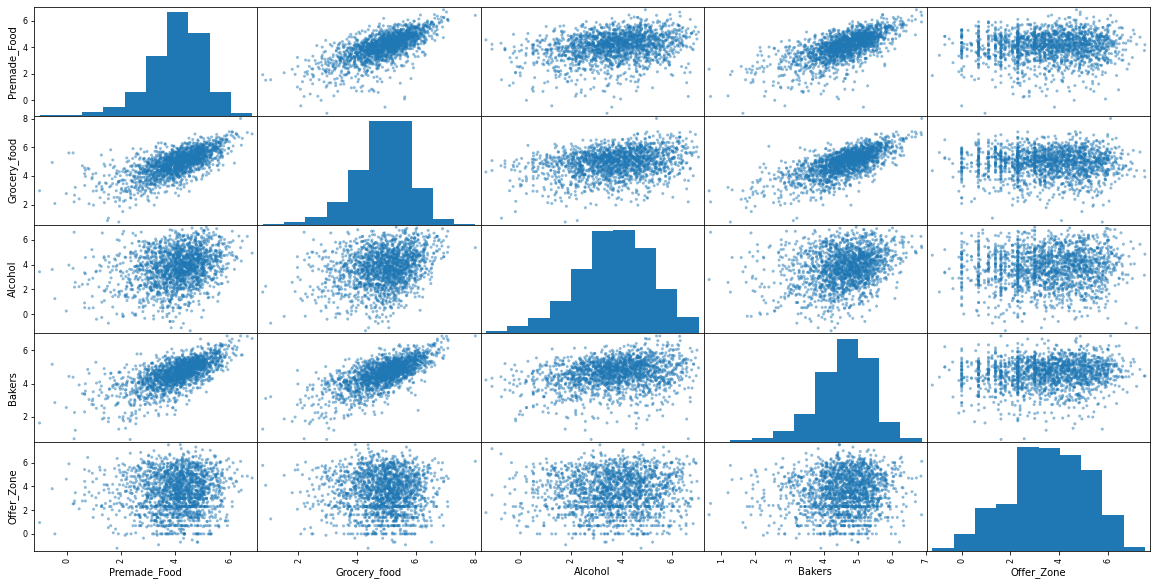

In [26]:
import numpy as np
# Scale the data using the natural logarithm
logged_data = np.log(df)
mask = np.isfinite(logged_data)

# use the .loc[] indexer to select only the finite rows
logged_data = logged_data.loc[mask.all(axis=1)]

# print the result
print(logged_data)

#-- Produce a scatter matrix using the logged data...
scatter = pandas.plotting.scatter_matrix(logged_data, figsize = (20,10))

In [27]:
#!pip3 uninstall scikit-learn
#!pip3 install -U scikit-learn

import sklearn 

from sklearn.decomposition import PCA

# TO DO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=5)
pca.fit(logged_data)

PCA(n_components=5)

Explained Variance Ratio: 
[0.49151288 0.23829016 0.1852452  0.05537006 0.0295817 ]
Cumulative Sum of Explained Variance Ratio: 
[0.49151288 0.72980304 0.91504824 0.9704183  1.        ]


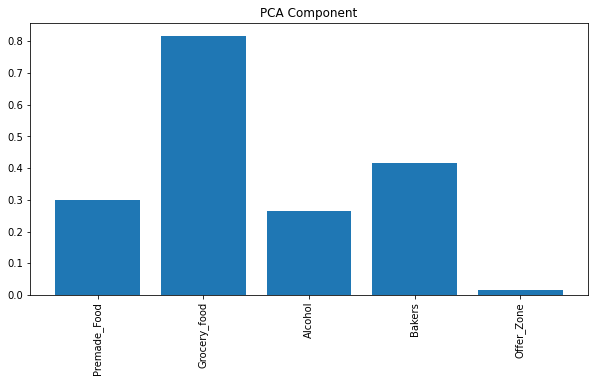

In [28]:
# create PCA object
pca = PCA()

# fit data to PCA object
pca.fit(df)

# print out explained variance ratio and cumulative sum
print("Explained Variance Ratio: ")
print(pca.explained_variance_ratio_)
print("Cumulative Sum of Explained Variance Ratio: ")
print(pca.explained_variance_ratio_.cumsum())

# get PCA components
components = pd.DataFrame(pca.components_, columns=df.columns)

# plot bar chart of PCA components
plt.figure(figsize=(10, 5))
plt.bar(components.columns, components.iloc[0])
plt.xticks(rotation=90)
plt.title('PCA Component')
plt.show()

In [34]:
pca = PCA(n_components=5)
Principal_components=pca.fit_transform(logged_data)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
print(pca_df)

          PC 1      PC 2      PC 3      PC 4      PC 5
0     0.179270 -0.731908 -0.037531  0.211063 -0.251041
1    -0.164083  0.026517 -0.513086  0.010288 -0.081128
2     0.364117 -2.439654  0.233739  0.970704 -0.842224
3     1.157754 -0.488358  0.960011 -0.154155  0.321581
4     0.490242 -0.276597 -0.681191  0.001454  0.157709
...        ...       ...       ...       ...       ...
1801 -0.487553  0.971514 -0.652288  0.567839 -0.246279
1802  0.493865 -0.165115 -0.493136  0.832917 -0.292535
1803 -0.395655  2.631686 -0.944719 -0.273543  0.129684
1804  3.282052  2.608963 -1.515386 -0.392471 -0.015853
1805 -1.188798  1.511316 -0.340071  0.185785  0.470451

[1806 rows x 5 columns]


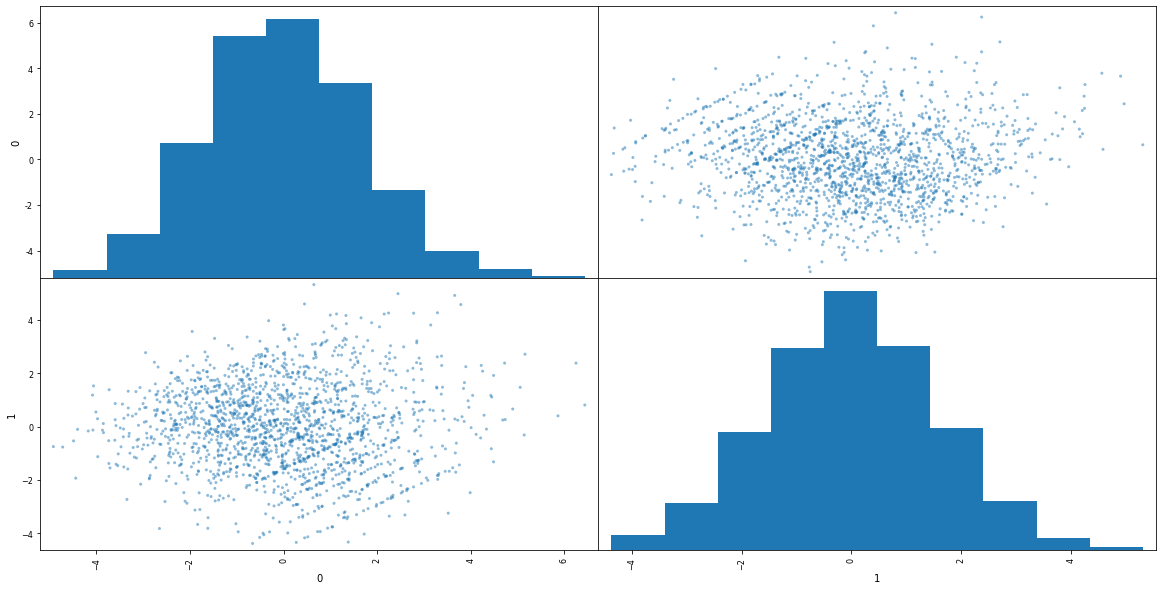

In [35]:
pca = PCA(n_components=2)
pca.fit(logged_data)

# TO DO: Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pandas.DataFrame(reduced_data)
scatter = pandas.plotting.scatter_matrix(reduced_data, figsize = (20,10))

In [36]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Created a clusterer that fits to 3 segments
k = 3
clusterer = KMeans(n_clusters=k)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    
#-- Calculated a silhouette score for the 3 segment solution
score = silhouette_score(reduced_data, preds, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))


For n_clusters = 3. The average silhouette_score is : 0.36107872405472985)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

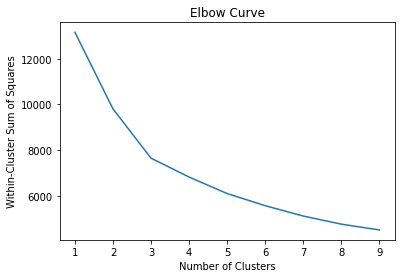

In [37]:


# Define a range of values for k
k_values = range(1, 10)

# Calculate the sum of squared distances for each value of k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(logged_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


In [38]:
# Create range of clusters 
range_n_clusters = list(range(2, 11))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TO DO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    # TO DO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TO DO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TO DO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.3316332832401635)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3. The average silhouette_score is : 0.36107872405472985)
For n_clusters = 4. The average silhouette_score is : 0.32707750481430514)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5. The average silhouette_score is : 0.31018529313630233)
For n_clusters = 6. The average silhouette_score is : 0.32822171124056043)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7. The average silhouette_score is : 0.3293594788530114)
For n_clusters = 8. The average silhouette_score is : 0.32138938159956104)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9. The average silhouette_score is : 0.31928762995603277)
For n_clusters = 10. The average silhouette_score is : 0.3252381526145743)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


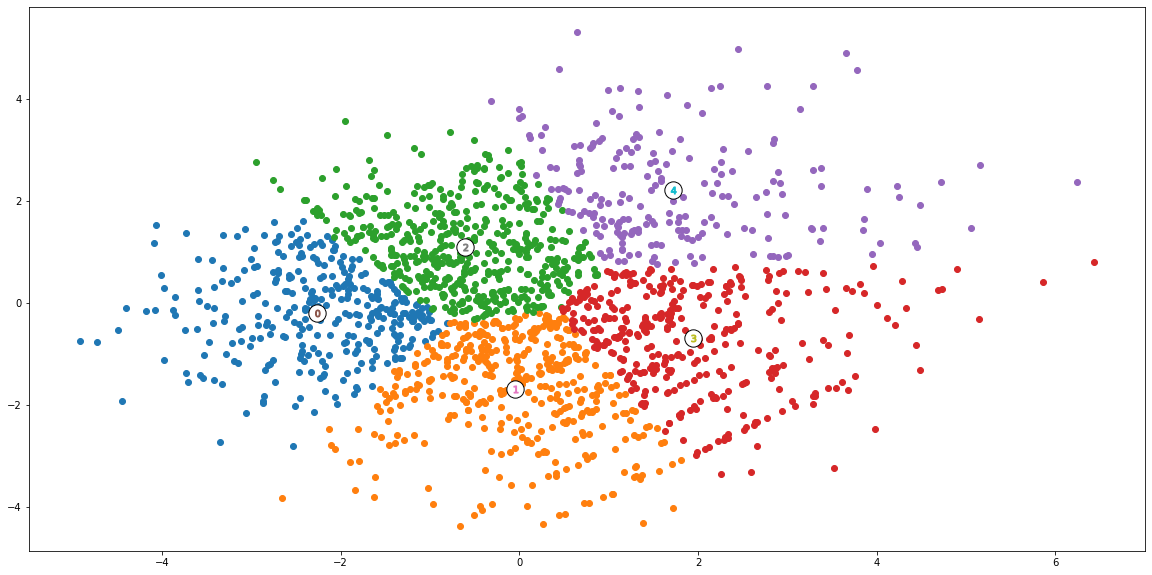

In [39]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pandas.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pandas.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [40]:

log_centres = pca.inverse_transform(centres)
true_centres = np.exp(log_centres)
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = df.columns)
true_centres.index = segments
print(true_centres)

           Premade_Food  Grocery_food  Alcohol  Bakers  Offer_Zone
Segment 0         130.0         263.0    159.0   193.0       125.0
Segment 1          92.0         213.0     93.0   137.0        10.0
Segment 2          51.0         116.0     34.0    95.0       116.0
Segment 3          35.0          93.0     19.0    65.0         6.0
Segment 4          17.0          45.0      5.0    40.0        61.0


In [43]:
#Joining the segment assignments to the original data 
final_assigments = pandas.concat([assignments, df], axis = 1)

#Creating a loop that describes summary statistics for each profile
for c, d in final_assigments.groupby('Cluster'):  
    print("Profile", c+1)
    display(d.describe())

Profile 1.0


,Cluster,Premade_Food,Grocery_food,Alcohol,Bakers,Offer_Zone
count,325.0,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.0,74.458492,178.452369,70.574185,123.603354,53.423046
std,0.0,68.692438,208.470762,104.906186,102.658009,102.951076
min,0.0,0.000000,2.870000,0.000000,6.250000,0.000000
25%,0.0,30.430000,75.460000,10.250000,56.680000,0.000000
50%,0.0,57.640000,138.180000,34.560000,93.130000,9.480000
75%,0.0,100.340000,215.010000,87.350000,167.280000,52.000000
max,0.0,605.410000,3026.050000,711.900000,963.470000,640.490000


Profile 2.0


,Cluster,Premade_Food,Grocery_food,Alcohol,Bakers,Offer_Zone
count,420.0,420.000000,420.000000,420.000000,420.000000,420.000000
mean,1.0,88.020262,199.054476,86.877643,134.219905,62.282190
std,0.0,86.547274,159.218834,128.557229,106.324980,133.807531
min,1.0,0.000000,8.010000,0.000000,2.380000,-15.000000
25%,1.0,34.680000,83.417500,11.460000,60.445000,0.000000
50%,1.0,64.100000,158.565000,38.885000,108.585000,9.250000
75%,1.0,110.825000,278.445000,109.667500,175.110000,66.000000
max,1.0,925.340000,1029.770000,837.980000,824.890000,1308.050000


Profile 3.0


,Cluster,Premade_Food,Grocery_food,Alcohol,Bakers,Offer_Zone
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000
mean,2.0,86.875671,202.267317,82.549248,132.504837,75.081931
std,0.0,77.190024,172.497745,116.190497,101.963860,187.231351
min,2.0,0.000000,1.340000,0.000000,3.230000,-10.000000
25%,2.0,29.662500,82.650000,14.010000,60.652500,0.000000
50%,2.0,63.505000,155.660000,39.990000,104.950000,10.000000
75%,2.0,121.410000,267.727500,102.737500,177.760000,80.050000
max,2.0,426.050000,1099.930000,868.610000,654.930000,2137.010000


Profile 4.0


,Cluster,Premade_Food,Grocery_food,Alcohol,Bakers,Offer_Zone
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000
mean,3.0,86.302689,199.922353,86.330504,132.255406,54.693165
std,0.0,69.058136,155.883165,134.821980,95.903226,109.084295
min,3.0,0.000000,7.320000,0.000000,1.910000,-4.000000
25%,3.0,33.190000,86.760000,12.960000,63.760000,0.000000
50%,3.0,69.910000,163.870000,38.380000,115.480000,8.300000
75%,3.0,123.550000,269.680000,100.670000,178.650000,52.400000
max,3.0,379.980000,947.560000,1125.210000,800.500000,844.000000


Profile 5.0


,Cluster,Premade_Food,Grocery_food,Alcohol,Bakers,Offer_Zone
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000
mean,4.0,87.223160,189.710991,93.252594,126.496557,46.362123
std,0.0,91.879469,171.126757,146.127605,96.388733,95.802796
min,4.0,1.890000,2.420000,0.000000,1.600000,-4.000000
25%,4.0,31.147500,77.065000,10.417500,62.662500,0.000000
50%,4.0,58.790000,140.260000,39.565000,92.540000,3.615000
75%,4.0,109.815000,254.935000,115.057500,169.425000,42.855000
max,4.0,644.830000,1186.060000,926.200000,565.560000,598.720000


In [49]:
# create a DataFrame with customer IDs and their corresponding cluster labels
#results = pd.DataFrame({'CustomerID': df['CustomerID'], 'ClusterLabel': cluster_labels})

# write results DataFrame to a file
# Create dictionary of customer ids and corresponding labels
import csv
labels = clusterer.labels_
customer_segments = {}
for i, label in enumerate(labels):
    customer_id = i + 1 
    customer_segments[customer_id] = label

# Write dictionary to results file
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['customer_id', 'segment'])
    for customer_id, segment in customer_segments.items():
        writer.writerow([customer_id, segment])